Libraries

In [452]:
import os
from mistralai import Mistral
from dotenv import load_dotenv
import pandas as pd
from pymongo import MongoClient
load_dotenv()
import time

Env and client setup

In [474]:
api_key = os.environ["mistral_key"]
agent_id = os.environ["agent_id"]
db_url = os.environ["DB_URL"]
model = "open-mistral-nemo"
client = Mistral(api_key=api_key)
mongo_client = MongoClient(db_url)
db  = mongo_client.reddit
post_db = db['post_new']
Quet_db=db['final_data']


Local Data import

In [487]:
rec = post_db.find()
rec = list(rec)
print(rec[0])
df=pd.DataFrame(list(rec))
df.head(10)

{'_id': ObjectId('67558db3eeb7770cf0a37c63'), 'id': '1h9gtbi', 'title': 'Do you think this startup is worth continuing?', 'selftext': "1,006 people came to my app and I made 9 sales. My product is $9.99 and it's a one-time payment. My profit rate is 90%. Do you think this is a good rate or is it not worth continuing? I haven't done any advertising so far, I just made 2 reddit posts without naming the app and in the comments they asked for the name of the app and I posted the link. Do you think I should advertise to influencers? I need help.", 'ups': 1, 'subreddit': 'startups', 'created_utc': 1733656859.0, 'num_comments': 6, 'url': 'https://www.reddit.com/r/startups/comments/1h9gtbi/do_you_think_this_startup_is_worth_continuing/', 'response': 'question'}


_id       id  \
0  67558db3eeb7770cf0a37c63  1h9gtbi   
1  67558db3eeb7770cf0a37c64  1h9e0an   
2  67558db3eeb7770cf0a37c65  1h9cua9   
3  67558db3eeb7770cf0a37c66  1h9bzig   
4  67558db3eeb7770cf0a37c67  1h9achm   
5  67558db3eeb7770cf0a37c68  1h9ac56   
6  67558db3eeb7770cf0a37c69  1h980yx   
7  67558db3eeb7770cf0a37c6a  1h96sie   
8  67558db3eeb7770cf0a37c6b  1h96sbl   
9  67558db3eeb7770cf0a37c6c  1h96d8c   

                                               title  \
0     Do you think this startup is worth continuing?   
1           Finally launched my LinkedIn AI chatbot!   
2              Finally!! I launched it after months    
3  Struggling with Low Conversions? Here’s How St...   
4                 Im so impatient and its killing me   
5          How do you validate your business ideas?    
6         What’s expected of an AI-powered SMM tool?   
7  Seeking Lightmatter and OpenAI Shares – Willin...   
8  Is there any pitch deck of a successful startu...   
9  Is Midjourney the best AI company in terms of ...   

                                            selftext  ups subreddit  \
0  1,006 people came to my app and I made 9 sales...    1  startups   
1  It's been a slog, but I finally launched my AI...    0  startups   
2  Finally!! I launched it after months \n\nAfter...   11  startups   
3  As a **startup founder**, you wear many hats—b...    0  startups   
4  I want to be an entrepreneur, or "make money o...    0  startups   
5  I recently read The Mom Test, and I'm wonderin...    5  startups   
6  As someone working on an AI platform that help...    8  startups   
7  Hi everyone,\n\nI’m interested in acquiring a ...    2  startups   
8  For our business, we need both B2B and B2C. \n...    1  startups   
9  Midjourney demonstrates remarkable unit econom...    7  startups   

    created_utc  num_comments  \
0  1.733657e+09             6   
1  1.733645e+09             9   
2  1.733640e+09             7   
3  1.733636e+09             0   
4  1.733630e+09            17   
5  1.733630e+09             5   
6  1.733623e+09             3   
7  1.733619e+09             5   
8  1.733619e+09             2   
9  1.733617e+09             2   

                                                 url    response  
0  https://www.reddit.com/r/startups/comments/1h9...    question  
1  https://www.reddit.com/r/startups/comments/1h9...  experience  
2  https://www.reddit.com/r/startups/comments/1h9...  experience  
3  https://www.reddit.com/r/startups/comments/1h9...    question  
4  https://www.reddit.com/r/startups/comments/1h9...    question  
5  https://www.reddit.com/r/startups/comments/1h9...    question  
6  https://www.reddit.com/r/startups/comments/1h9...    question  
7  https://www.reddit.com/r/startups/comments/1h9...    question  
8  https://www.reddit.com/r/startups/comments/1h9...    question  
9  https://www.reddit.com/r/startups/comments/1h9...    question

In [488]:
df['response'].unique()

array(['question', 'experience', 'promotion', nan], dtype=object)

C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\2501740875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x='response',palette='muted')


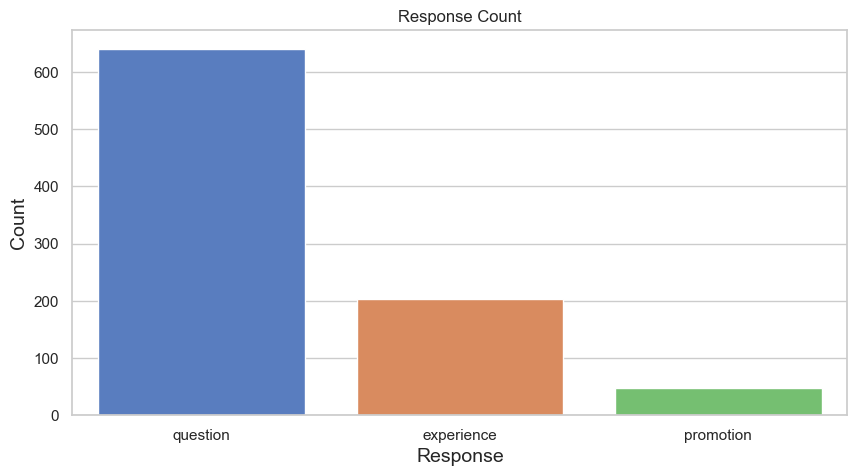

In [489]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,5))
sns.countplot(df,x='response',palette='muted')
plt.title("Response Count")
plt.xlabel("Response", fontsize=14)
plt.ylabel("Count",fontsize=14)
plt.show()

In [490]:
df['response'].unique()

array(['question', 'experience', 'promotion', nan], dtype=object)

Basic Classification with Mistral

In [491]:
unique_rows = df[~df.duplicated()]
print("Unique Rows:")
unique_rows.shape

Unique Rows:


(10001, 10)

Extracting the categorized Data 

In [492]:

sample=post_db.find({'response':{'$exists':True}})
sample=list(sample)
df1=pd.DataFrame(sample)
df1.head()

_id       id  \
0  67558db3eeb7770cf0a37c63  1h9gtbi   
1  67558db3eeb7770cf0a37c64  1h9e0an   
2  67558db3eeb7770cf0a37c65  1h9cua9   
3  67558db3eeb7770cf0a37c66  1h9bzig   
4  67558db3eeb7770cf0a37c67  1h9achm   

                                               title  \
0     Do you think this startup is worth continuing?   
1           Finally launched my LinkedIn AI chatbot!   
2              Finally!! I launched it after months    
3  Struggling with Low Conversions? Here’s How St...   
4                 Im so impatient and its killing me   

                                            selftext  ups subreddit  \
0  1,006 people came to my app and I made 9 sales...    1  startups   
1  It's been a slog, but I finally launched my AI...    0  startups   
2  Finally!! I launched it after months \n\nAfter...   11  startups   
3  As a **startup founder**, you wear many hats—b...    0  startups   
4  I want to be an entrepreneur, or "make money o...    0  startups   

    created_utc  num_comments  \
0  1.733657e+09             6   
1  1.733645e+09             9   
2  1.733640e+09             7   
3  1.733636e+09             0   
4  1.733630e+09            17   

                                                 url    response  
0  https://www.reddit.com/r/startups/comments/1h9...    question  
1  https://www.reddit.com/r/startups/comments/1h9...  experience  
2  https://www.reddit.com/r/startups/comments/1h9...  experience  
3  https://www.reddit.com/r/startups/comments/1h9...    question  
4  https://www.reddit.com/r/startups/comments/1h9...    question

In [493]:
df1.columns

Index(['_id', 'id', 'title', 'selftext', 'ups', 'subreddit', 'created_utc',
       'num_comments', 'url', 'response'],
      dtype='object')

Extracting Question And Experience  Catogorized Data To Find Insights

In [494]:
df_cleaned = df[~df['response'].str.contains('promotion|no_response',case=False,na=False)]
df_cleaned['response'].unique()
df2=df_cleaned
df2.shape
df2['response'].value_counts()

response
question      641
experience    203
Name: count, dtype: int64

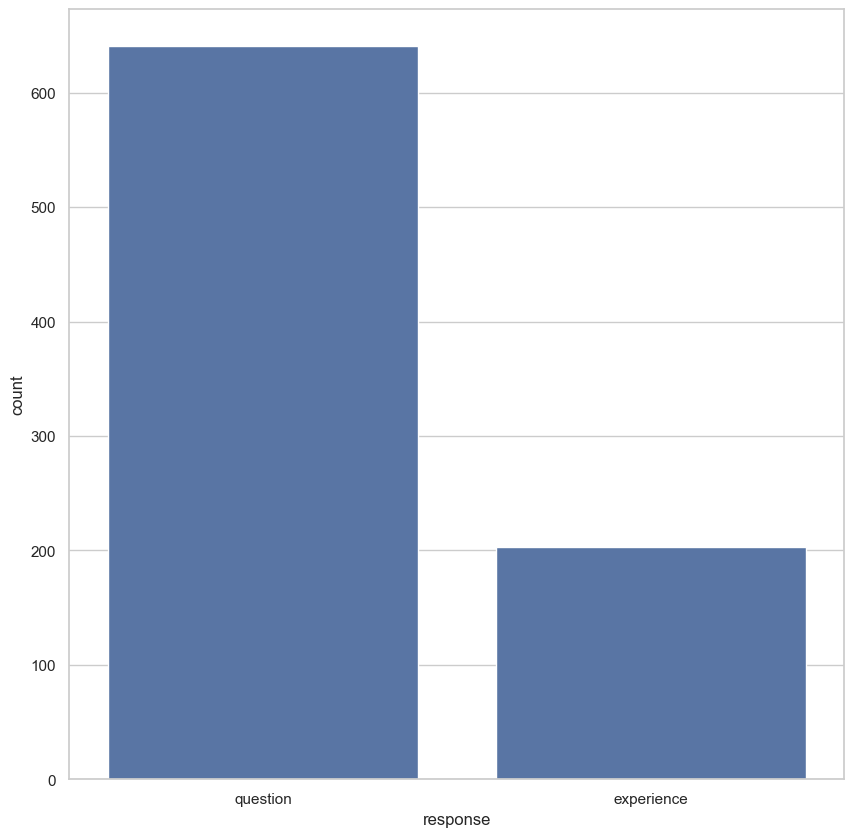

In [495]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.countplot(df2,x='response')
plt.show()

In [ ]:
df2['created_date']=pd.to_datetime(df['created_utc'],unit='s') 

C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\4220556463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['created_date']=pd.to_datetime(df['created_utc'],unit='s')


In [ ]:
df2.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\973951671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['created_date'] = pd.to_datetime(df2['created_date'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\973951671.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['year'] = df2['created_date'].dt.year


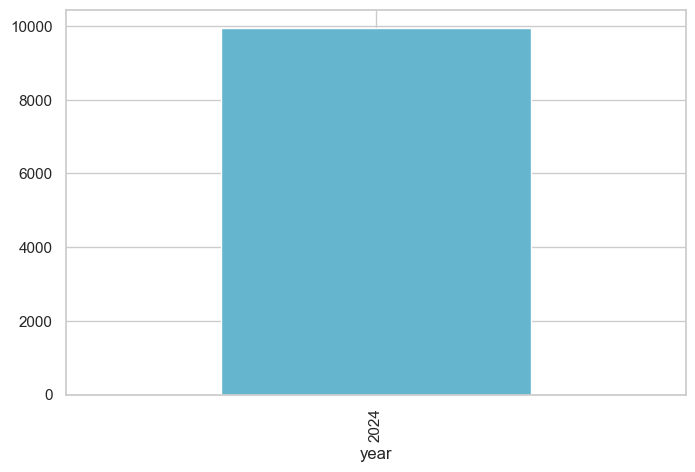

In [ ]:
import matplotlib.pyplot as plt
df2['created_date'] = pd.to_datetime(df2['created_date'])
df2['year'] = df2['created_date'].dt.year
yearly_post = df2.groupby('year').size()
yearly_post.plot(kind='bar', figsize=(8, 5), color='c')
plt.show()

In [ ]:
df2.drop(labels=['_id','id','created_utc','url'], axis=1,inplace=True)

In [ ]:
df2.head()

Data Preprocessing 

In [525]:
import re
import string 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def text_cleaning(text):
    if text is None:
        return " "
    text = text.lower()
    text = re.sub(r'https?://\S+|www\.\S+', '', text) 
    text = re.sub(r'<.*?>', '', text) 
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\d', '', text) 
    text = re.sub(r'\s+', ' ', text).strip()
    tokens = text.split()
    tokens=[lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    tetx=''.join(tokens)
    return text
df2['cleaned_title']=df2['title'].apply(text_cleaning)
df2['cleaned_selftext']=df2['selftext'].apply(text_cleaning)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\2321715530.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cleaned_title']=df2['title'].apply(text_cleaning)
C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\2321715530.py:29: SettingWithCopyWarning: 
A value is trying to be se

C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\336140601.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['combined']=df2['cleaned_title']+ " " +df2['cleaned_selftext']


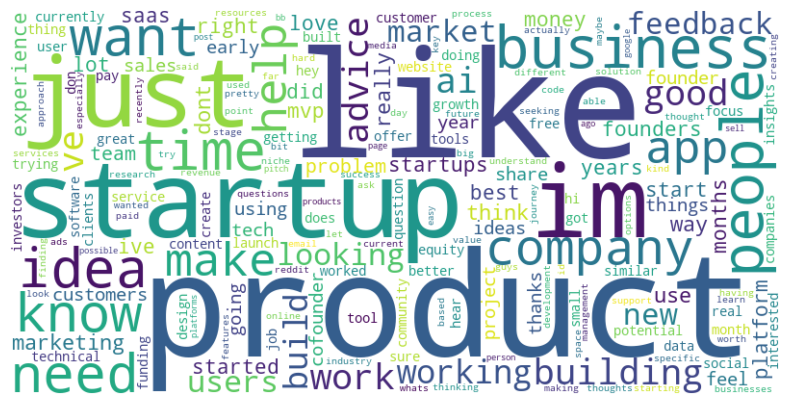

In [526]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
df2['combined']=df2['cleaned_title']+ " " +df2['cleaned_selftext']
y=CountVectorizer(stop_words='english',max_features=300)
x=y.fit_transform(df2['combined'])
ordfreq = dict(zip(y.get_feature_names_out(), x.toarray().sum(axis=0)))
wordcloud=WordCloud( width=800,height=400, background_color='white').generate_from_frequencies(ordfreq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.title('Insights from combined Data')
plt.show()


SENTIMENT ANALYSIS

In [527]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
x=SentimentIntensityAnalyzer()
def sentiment_analysis(text):
    score=x.polarity_scores(text)
    if score['compound']>=0.05:
        return 'Positive'
    elif score['compound']<=-0.05:
        return 'Negative'
    else:
        return 'Netural'
df2['Sentiment']=df2['combined'].apply(sentiment_analysis)





C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\853054144.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Sentiment']=df2['combined'].apply(sentiment_analysis)


In [511]:
df2.head()

_id       id  \
0  67558db3eeb7770cf0a37c63  1h9gtbi   
1  67558db3eeb7770cf0a37c64  1h9e0an   
2  67558db3eeb7770cf0a37c65  1h9cua9   
3  67558db3eeb7770cf0a37c66  1h9bzig   
4  67558db3eeb7770cf0a37c67  1h9achm   

                                               title  \
0     Do you think this startup is worth continuing?   
1           Finally launched my LinkedIn AI chatbot!   
2              Finally!! I launched it after months    
3  Struggling with Low Conversions? Here’s How St...   
4                 Im so impatient and its killing me   

                                            selftext  ups subreddit  \
0  1,006 people came to my app and I made 9 sales...    1  startups   
1  It's been a slog, but I finally launched my AI...    0  startups   
2  Finally!! I launched it after months \n\nAfter...   11  startups   
3  As a **startup founder**, you wear many hats—b...    0  startups   
4  I want to be an entrepreneur, or "make money o...    0  startups   

    created_utc  num_comments  \
0  1.733657e+09             6   
1  1.733645e+09             9   
2  1.733640e+09             7   
3  1.733636e+09             0   
4  1.733630e+09            17   

                                                 url    response  \
0  https://www.reddit.com/r/startups/comments/1h9...    question   
1  https://www.reddit.com/r/startups/comments/1h9...  experience   
2  https://www.reddit.com/r/startups/comments/1h9...  experience   
3  https://www.reddit.com/r/startups/comments/1h9...    question   
4  https://www.reddit.com/r/startups/comments/1h9...    question   

         created_date  year  \
0 2024-12-08 11:20:59  2024   
1 2024-12-08 07:57:28  2024   
2 2024-12-08 06:34:20  2024   
3 2024-12-08 05:37:48  2024   
4 2024-12-08 04:00:40  2024   

                                       cleaned_title  \
0      do you think this startup is worth continuing   
1            finally launched my linkedin ai chatbot   
2                 finally i launched it after months   
3  struggling with low conversions here’s how sta...   
4                 im so impatient and its killing me   

                                    cleaned_selftext  \
0  people came to my app and i made sales my prod...   
1  its been a slog but i finally launched my ai c...   
2  finally i launched it after months after takin...   
3  as a startup founder you wear many hats—but cr...   
4  i want to be an entrepreneur or make money onl...   

                                            combined  
0  do you think this startup is worth continuing ...  
1  finally launched my linkedin ai chatbot its be...  
2  finally i launched it after months finally i l...  
3  struggling with low conversions here’s how sta...  
4  im so impatient and its killing me i want to b...

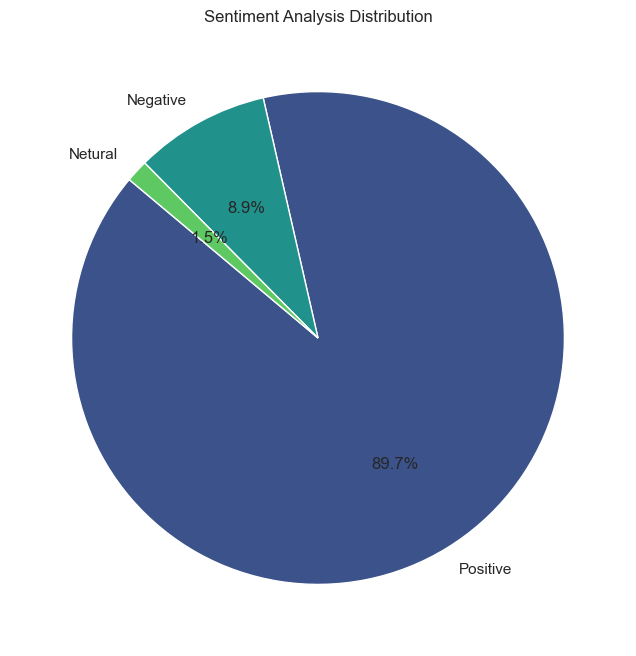

In [528]:
sentiment_counts = df2['Sentiment'].value_counts()
# Pie Chart
plt.figure(figsize=(10, 8))
plt.pie(
    sentiment_counts.values, 
    labels=sentiment_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=sns.color_palette('viridis', len(sentiment_counts))
)
plt.title('Sentiment Analysis Distribution')
plt.show()


TOPIC MODELLING ON POSTIVE SENTIMENT 

In [529]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
positive_posts = df2[df2['Sentiment'] == 'Positive']
vectorizer = CountVectorizer(stop_words='english', max_features=100)
X = vectorizer.fit_transform(positive_posts['combined'])
lda_positive = LatentDirichletAllocation(n_components=5, doc_topic_prior=0.1, topic_word_prior=0.01, random_state=42)
lda_positive.fit(X)
feature_names_positive = vectorizer.get_feature_names_out()
for ind, topic in enumerate(lda_positive.components_):
    print(f"Positive Topic {ind + 1}:")
    print([feature_names_positive[i] for i in topic.argsort()[-10:]])

Positive Topic 1:
['data', 'use', 'service', 'content', 'platform', 'marketing', 'tools', 'like', 'business', 'ai']
Positive Topic 2:
['equity', 've', 'work', 'working', 'business', 'time', 'just', 'like', 'company', 'startup']
Positive Topic 3:
['just', 'good', 'people', 'want', 'need', 'know', 'like', 'ive', 'dont', 'im']
Positive Topic 4:
['help', 'platform', 'project', 'building', 'like', 'people', 'mvp', 'users', 'idea', 'app']
Positive Topic 5:
['make', 'know', 'startup', 'building', 'customers', 'just', 'saas', 'market', 'feedback', 'product']


INSIGHTS FROM POSITIVE SEMNTIMENT POST

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


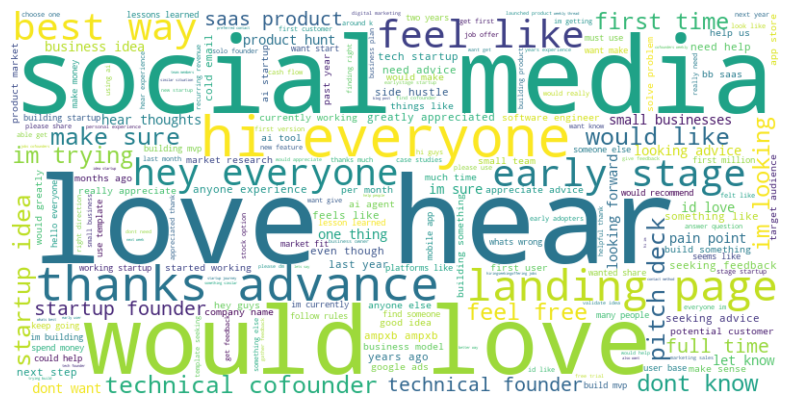

In [534]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Join all positive posts text and filter out stopwords
positive_text = ' '.join(
    word for word in ' '.join(positive_posts['combined']).split()
    if word.lower() not in stop_words
)

# Create WordCloud
wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    stopwords=stop_words  # Directly pass stopwords to the WordCloud
).generate(positive_text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


BIGRAM-TRIGRAM ANALYSIS


In [545]:
vectorizer = TfidfVectorizer(ngram_range=(2, 3), stop_words='english',max_features=50)
X = vectorizer.fit_transform(positive_posts['combined'])
lda = LatentDirichletAllocation(n_components=5,random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [544]:
feature_names_positive = vectorizer.get_feature_names_out()
for ind, topic in enumerate(lda.components_):
    print(f"Positive Topic {ind + 1}:")
    print([feature_names_positive[i] for i in topic.argsort()[-10:]])

Positive Topic 1:
['answer questions', 'app store', 'im doing', 'small team', 'wanted share', 'im just', 'hi im', 'months ago', 'feels like', 'feel like']
Positive Topic 2:
['id like', 've built', 'make sure', 'software engineer', 've seen', 'need help', 'thanks advance', 'greatly appreciated', 'let know', 'best way']
Positive Topic 3:
['startup founders', 'things like', 'love hear', 'looking advice', 'good idea', 'want start', 'saas product', 'looking forward', 'hey guys', 'early stage']
Positive Topic 4:
['started working', 'make sense', 'really appreciate', 'im looking', 'hear thoughts', 'pitch deck', 'im trying', 'id love', 'landing page', 'love hear']
Positive Topic 5:
['market fit', 'whats wrong', 'really need', 'pain points', 'need advice', 'years ago', 'want know', 'technical cofounder', 'dont know', 'social media']


C:\Users\Admin\AppData\Local\Temp\ipykernel_33356\2802589278.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_posts['cluster'] = kmeans.fit_predict(X)


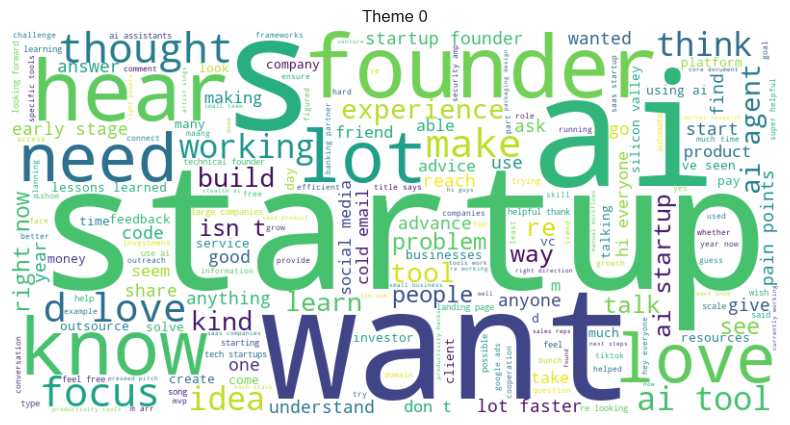

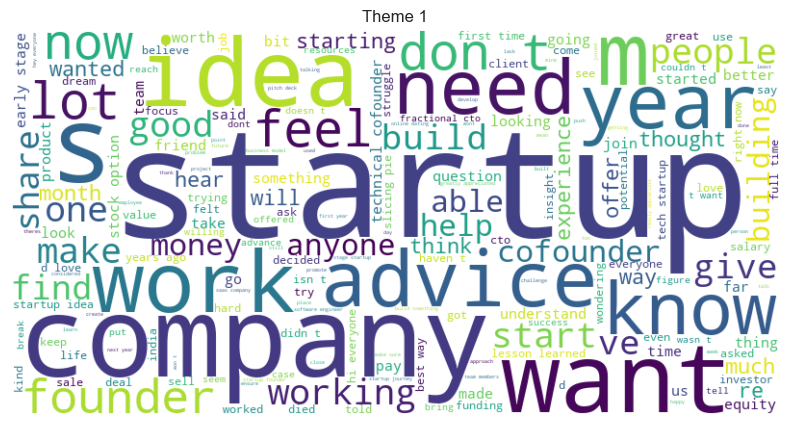

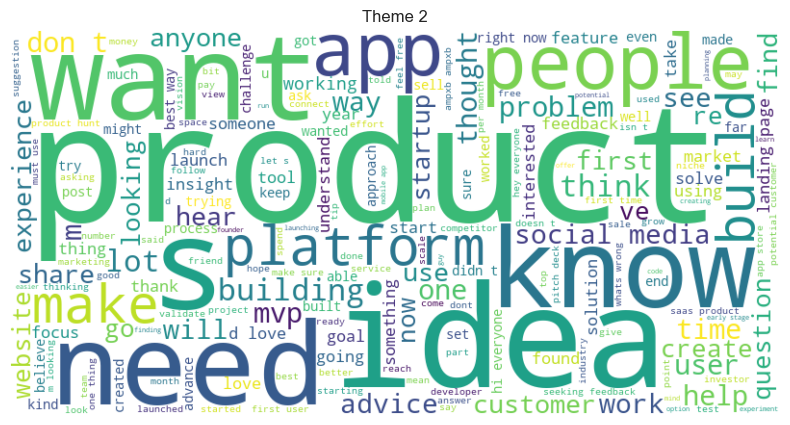

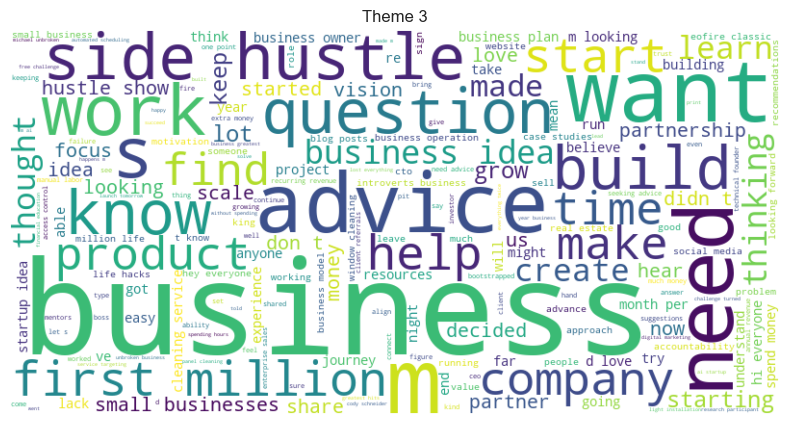

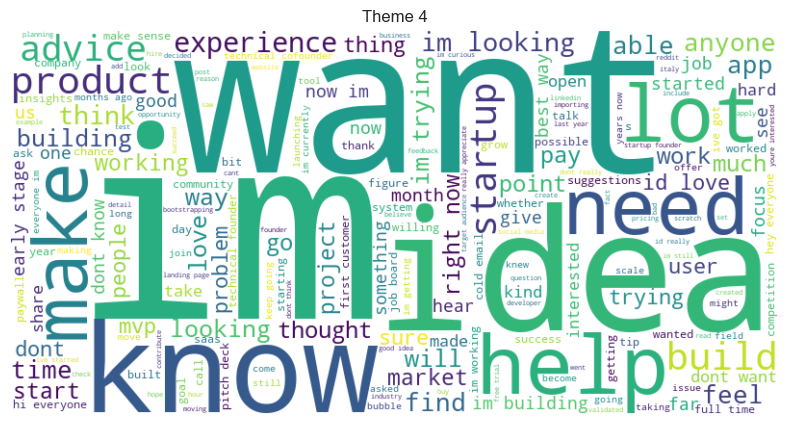

In [546]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
tfidf = TfidfVectorizer(stop_words='english', max_features=150)
X = tfidf.fit_transform(positive_posts['combined'])
kmeans = KMeans(n_clusters=5, random_state=42)
positive_posts['cluster'] = kmeans.fit_predict(X)

for i in range(5):
    cluster_indices = positive_posts['cluster'] == i
    cluster_text = ' '.join(positive_posts[cluster_indices]['combined'])
    cluster_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(cluster_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Theme {i}')
    plt.show()

In [556]:
from sklearn.decomposition import LatentDirichletAllocation
Negative_posts = df2[df2['Sentiment'] == 'Negative']
vectorizer = CountVectorizer(ngram_range=(2, 3),stop_words='english', max_features=40)
X = vectorizer.fit_transform(Negative_posts['combined'])
lda_Negative = LatentDirichletAllocation(n_components=5, doc_topic_prior=0.1, topic_word_prior=0.01, random_state=42)
lda_Negative.fit(X)
feature_names_Negative = vectorizer.get_feature_names_out()
for ind, topic in enumerate(lda_Negative.components_):
    print(f"Negative Topic {ind + 1}:")
    print([feature_names_Negative[i] for i in topic.argsort()[-10:]])

Negative Topic 1:
['feels like', 'idea sell', 'thanksgiving holidays', 'lot people', 'feel like', 'past months', 'replace salesforce', 'telling people', 'small business', 'dont want']
Negative Topic 2:
['telling people', 'stage testing', 'testing mvp', 'stage testing mvp', 'early stage', 'work stressed', 'board member', 'new board member', 'new board', 'months ago']
Negative Topic 3:
['idea sell', 'dont know', 'play store', 'spend subscriptions', 'solve problem', 'design agency', 'web design', 'web design agency', 'new technology', 'feels like']
Negative Topic 4:
['feel like', 'thanksgiving holidays', 'past months', 'dont know', 'hiring process', 'maintenance app', 'hire developer maintenance', 'fake downloads', 'solo founder', 'mental health']
Negative Topic 5:
['idea sell', 'months ago', 'lot people', 'need advice', 'unit economics', 'started bb', 'product companies', 'startup need', 'discord server', 'social media']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


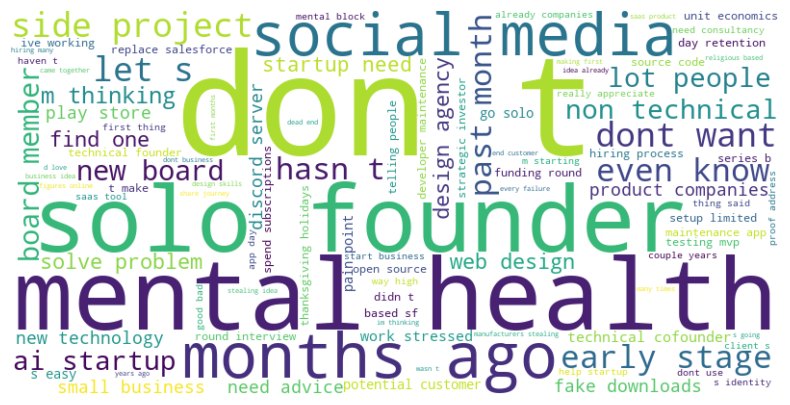

In [575]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
Negative_text = ' '.join(
    word for word in ' '.join(Negative_posts['combined']).split()
    if word.lower() not in stop_words
)

wc = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100
).generate(Negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
# plt.title("factors affecting the startup")
plt.axis('off')
plt.show()



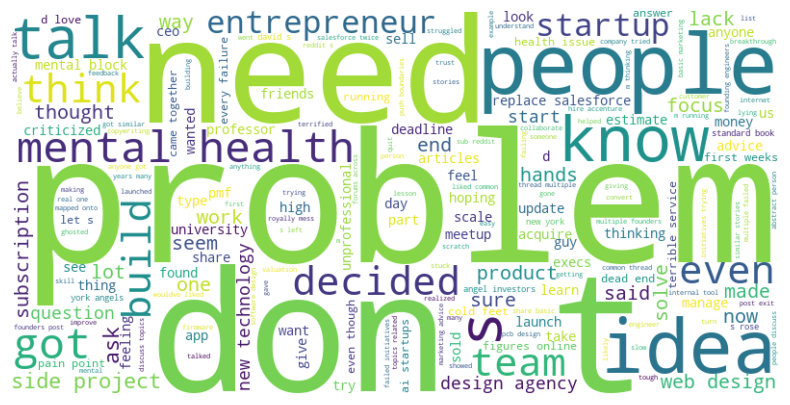

In [576]:
failure_keywords = ['failed', 'failure', 'problems', 'challenges', 'issues', 'mistakes']
failure_posts = Negative_posts[Negative_posts['combined'].str.contains('|'.join(failure_keywords), case=False)]
failure_text = ' '.join(failure_posts['combined'])
failure_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(failure_text)
plt.figure(figsize=(10, 5))
plt.imshow(failure_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [560]:
ty=Quet_db.find()
sy=list(ty)


In [561]:
ques_df=pd.DataFrame(sy)

In [562]:
ques_df.dropna(subset=['title', 'selftext', 'comment'], inplace=True)
ques_df.drop_duplicates(subset=['comment'], inplace=True)
ques_df.shape

(4859, 7)

In [563]:
ques_df['title_cleaned']=ques_df['title'].apply(text_cleaning)
ques_df['seltext_cleaned']=ques_df['selftext'].apply(text_cleaning)
ques_df['comment_cleaned']=ques_df['comment'].apply(text_cleaning)

ques_df.head()


_id  post_id  \
0  675d82933c7218fc233dcf49  1h9gtbi   
1  675d82933c7218fc233dcf4a  1h9gtbi   
2  675d82933c7218fc233dcf4b  1h9gtbi   
3  675d82933c7218fc233dcf4c  1h9gtbi   
4  675d82933c7218fc233dcf4d  1h9gtbi   

                                            title  \
0  Do you think this startup is worth continuing?   
1  Do you think this startup is worth continuing?   
2  Do you think this startup is worth continuing?   
3  Do you think this startup is worth continuing?   
4  Do you think this startup is worth continuing?   

                                            selftext comms_id  \
0  1,006 people came to my app and I made 9 sales...  m10p48u   
1  1,006 people came to my app and I made 9 sales...  m111ol6   
2  1,006 people came to my app and I made 9 sales...  m10mfqc   
3  1,006 people came to my app and I made 9 sales...  m10vjmy   
4  1,006 people came to my app and I made 9 sales...  m10mg6p   

                                             comment   ups  \
0  Every popular thing ever, that's not sold in b...  18.0   
1                   9 sales in 9 minutes or 9 years?  13.0   
2  This is far from enough information to decide....   7.0   
3  I don’t know.  You’d have to look at the total...   2.0   
4  I will need to understand what market you are ...   1.0   

                                   title_cleaned  \
0  do you think this startup is worth continuing   
1  do you think this startup is worth continuing   
2  do you think this startup is worth continuing   
3  do you think this startup is worth continuing   
4  do you think this startup is worth continuing   

                                     seltext_cleaned  \
0  people came to my app and i made sales my prod...   
1  people came to my app and i made sales my prod...   
2  people came to my app and i made sales my prod...   
3  people came to my app and i made sales my prod...   
4  people came to my app and i made sales my prod...   

                                     comment_cleaned  
0  every popular thing ever thats not sold in bul...  
1                          sales in minutes or years  
2  this is far from enough information to decide ...  
3  i don’t know you’d have to look at the total a...  
4  i will need to understand what market you are ...

In [573]:
ques_df.dropna(subset=['title_cleaned', 'seltext_cleaned', 'comment_cleaned'], inplace=True)
ques_df.drop_duplicates(subset=['comment_cleaned'], inplace=True)


Calcualting then cosine similarity and avg sentiment for the comments 


In [569]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util
from textblob import TextBlob
from nltk.stem import WordNetLemmatizer
import pandas as pd
import numpy as np

def preprocess(text):
    import re
    lemmatizer = WordNetLemmatizer()  
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])  
grouped = ques_df.groupby('post_id')
model = SentenceTransformer('all-MiniLM-L6-v2') 
results = []
for post_id, group in grouped:
    post_title = preprocess(group['title_cleaned'].iloc[0])  
    post_text = preprocess(group['seltext_cleaned'].iloc[0])  
    comments = [preprocess(comment) for comment in group['comment'].tolist()]  
    ups = group['ups'].tolist()  
    comments_with_sentiment = [
        {"comment": comment, 
         "sentiment_score": TextBlob(comment).sentiment.polarity,
         "ups": upvote} for comment, upvote in zip(comments, ups)
    ]
    avg_sentiment = (
        sum([item["sentiment_score"] for item in comments_with_sentiment]) /
        len(comments_with_sentiment) if comments_with_sentiment else 0
    )
    
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    tfidf_vectors = vectorizer.fit_transform([post_text] + comments)
    cosine_sim = cosine_similarity(tfidf_vectors[0:1], tfidf_vectors[1:]).flatten()
    
    post_embedding = model.encode(post_text)
    comment_embeddings = model.encode(comments)
    semantic_sim = util.cos_sim(post_embedding, comment_embeddings).numpy().flatten()

    combined_scores = 0.1* cosine_sim + 0.9 * semantic_sim
    results.append({
        "post_id": post_id,
        "post_title": post_title,
        "self_text": post_text,
        "comments_with_sentiment": comments_with_sentiment,
        "average_sentiment": avg_sentiment,
        "comments_relevance":  combined_scores.tolist(),
        "comments": comments
    })
results_df = pd.DataFrame(results)
print(results_df)
results_df.head


     post_id                                         post_title  \
0    1gg25vh                          how much to ask a the cto   
1    1gg38lo  how do you compile a list of company using a s...   
2    1gg4a8b                              sellexit saas company   
3    1gg7n6h       twosided marketplace chicken and egg problem   
4    1gg7uaq                 whats your experience with mailjet   
..       ...                                                ...   
593  1h96sie  seeking lightmatter and openai share – willing...   
594  1h980yx           what’s expected of an aipowered smm tool   
595  1h9ac56             how do you validate your business idea   
596  1h9achm                  im so impatient and it killing me   
597  1h9gtbi      do you think this startup is worth continuing   

                                             self_text  \
0    i am talking to a potential startup they are o...   
1    i know builtwith and stackshare but the saas i...   
2    hey everyone is 

<bound method NDFrame.head of      post_id                                         post_title  \
0    1gg25vh                          how much to ask a the cto   
1    1gg38lo  how do you compile a list of company using a s...   
2    1gg4a8b                              sellexit saas company   
3    1gg7n6h       twosided marketplace chicken and egg problem   
4    1gg7uaq                 whats your experience with mailjet   
..       ...                                                ...   
593  1h96sie  seeking lightmatter and openai share – willing...   
594  1h980yx           what’s expected of an aipowered smm tool   
595  1h9ac56             how do you validate your business idea   
596  1h9achm                  im so impatient and it killing me   
597  1h9gtbi      do you think this startup is worth continuing   

                                             self_text  \
0    i am talking to a potential startup they are o...   
1    i know builtwith and stackshare but the saas

In [566]:
results_df.head(3)

post_id                                         post_title  \
0  1gg25vh                          how much to ask a the cto   
1  1gg38lo  how do you compile a list of company using a s...   
2  1gg4a8b                              sellexit saas company   

                                           self_text  \
0  i am talking to a potential startup they are o...   
1  i know builtwith and stackshare but the saas i...   
2  hey everyone is it more challenging to sell a ...   

                             comments_with_sentiment  average_sentiment  \
0  [{'comment': 'I once got 5% to help build a pr...           0.111642   
1  [{'comment': 'Smart approach so far! Another c...           0.167328   
2  [{'comment': '1. Mhmmm. can be a bit more chal...           0.156700   

                                  comments_relevance  \
0  [0.0, 0.0319964424359964, 0.12713739180118827,...   
1                              [0.04941047447665092]   
2  [0.16375432462683517, 0.059881234889706036, 0....   

                                            comments  
0  [I once got 5% to help build a product from sc...  
1  [Smart approach so far! Another couple of idea...  
2  [1. Mhmmm. can be a bit more challenging to se...

In [420]:
results_df.shape

(598, 7)

In [571]:
z=results_df['self_text'].iloc[5]
y=results_df['comments_relevance'].iloc[5]
x=results_df['comments'].iloc[5]
print(f"{z} title")
print(f"{x[2]} the comment ")
print(f"{y[2]} comment_relevance")




im curious to know before starting on my idea im not sure how successful it will be after building it but for a safer side i want to make sure we launch a good product which is easily adaptive by user im afraid of ending up with poor product which user refuse to use to so anyone knowledgeable can sharethed to do check list and read the user mind before we spend money kind of like preparing design prototype and check with network if good or market research title
Built your MVP using no code or Cursor AI. Minimal outlay for maximum impact. the comment 
0.20832619071006775 comment_relevance


In [ ]:
ques_df.columns

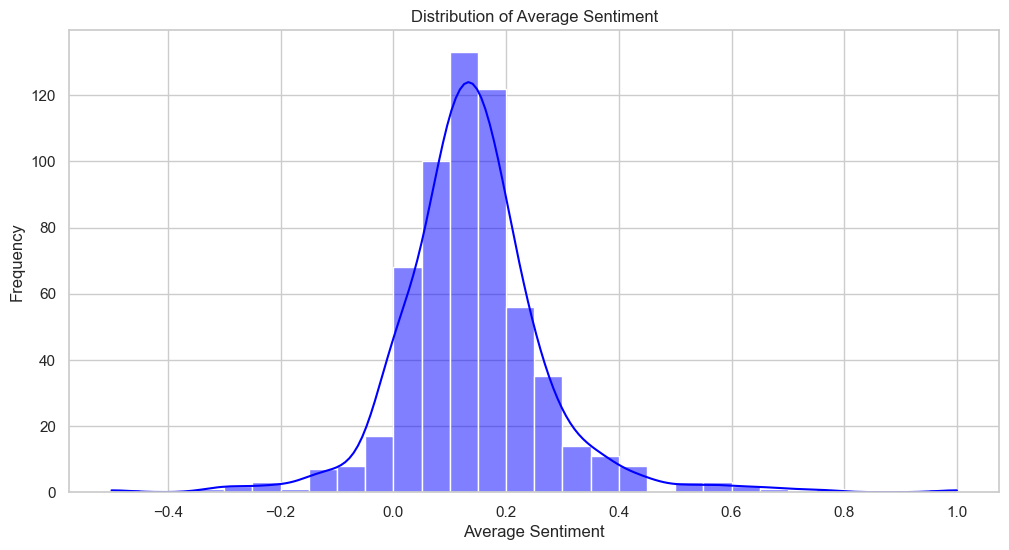

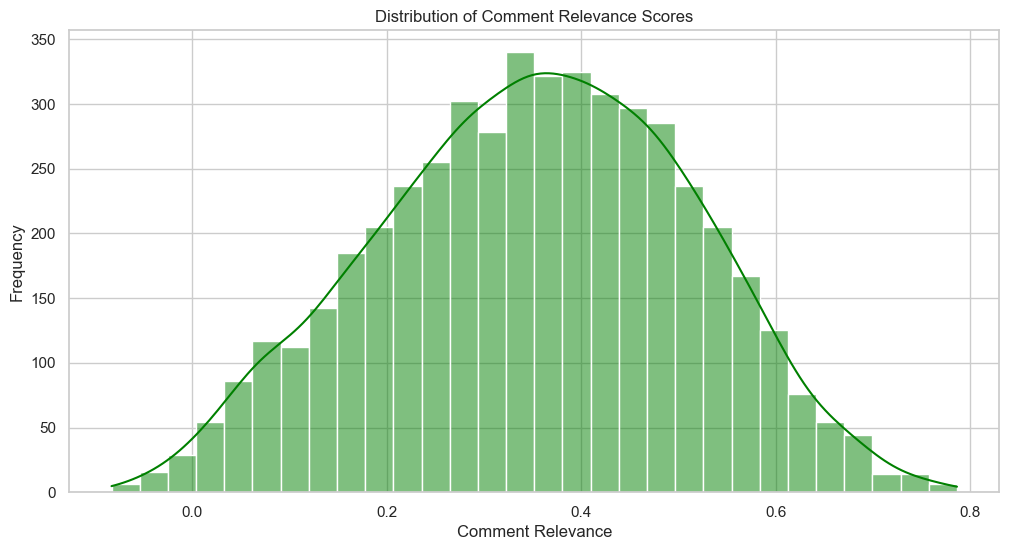

In [572]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Plotting average sentiment
plt.figure(figsize=(12, 6))
sns.histplot(results_df['average_sentiment'], bins=30, kde=True, color='blue')
plt.title('Distribution of Average Sentiment')
plt.xlabel('Average Sentiment')
plt.ylabel('Frequency')
plt.show()

# Plotting comment relevance
plt.figure(figsize=(12, 6))
relevance_data = results_df.explode('comments_relevance')['comments_relevance'].tolist()
sns.histplot(relevance_data, bins=30, kde=True, color='green')
plt.title('Distribution of Comment Relevance Scores')
plt.xlabel('Comment Relevance')
plt.ylabel('Frequency')
plt.show()


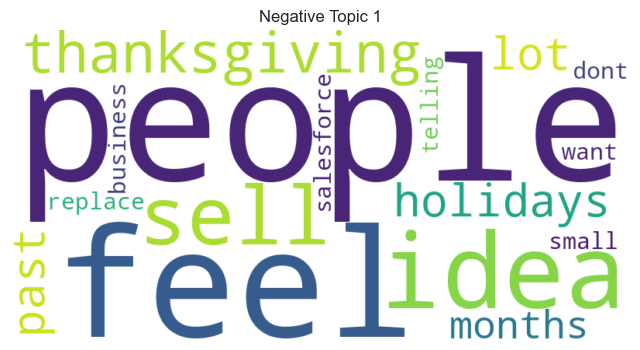

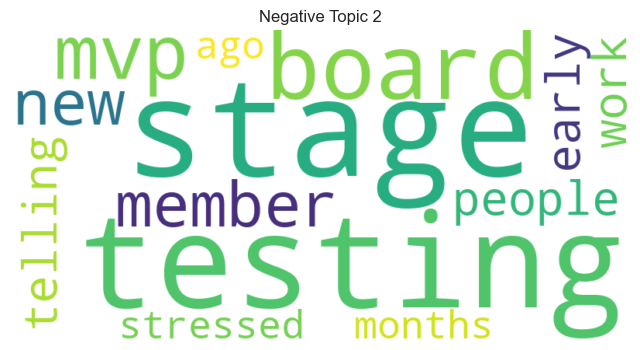

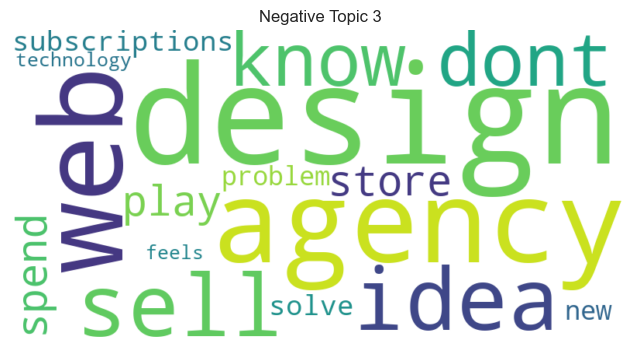

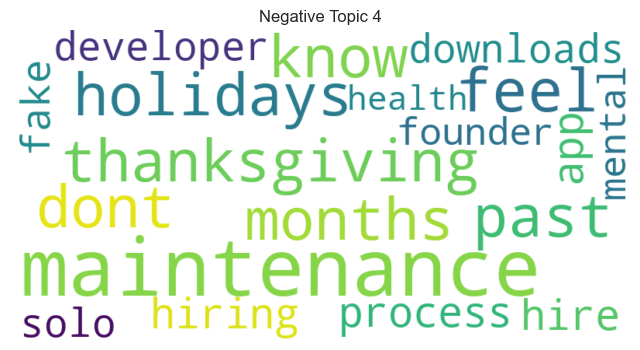

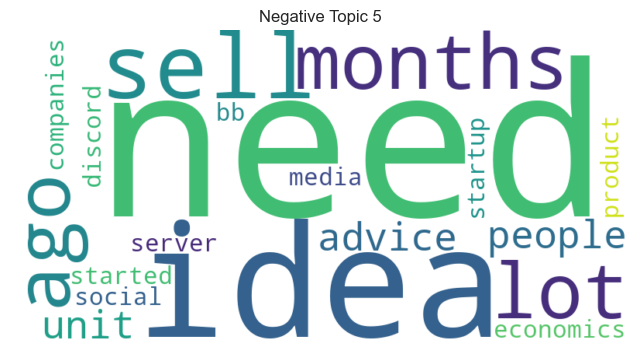

In [577]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the topics
topics = {
    "Negative Topic 1": ['feels like', 'idea sell', 'thanksgiving holidays', 'lot people', 'feel like', 
                         'past months', 'replace salesforce', 'telling people', 'small business', 'dont want'],
    "Negative Topic 2": ['telling people', 'stage testing', 'testing mvp', 'stage testing mvp', 'early stage', 
                         'work stressed', 'board member', 'new board member', 'new board', 'months ago'],
    "Negative Topic 3": ['idea sell', 'dont know', 'play store', 'spend subscriptions', 'solve problem', 
                         'design agency', 'web design', 'web design agency', 'new technology', 'feels like'],
    "Negative Topic 4": ['feel like', 'thanksgiving holidays', 'past months', 'dont know', 'hiring process', 
                         'maintenance app', 'hire developer maintenance', 'fake downloads', 'solo founder', 'mental health'],
    "Negative Topic 5": ['idea sell', 'months ago', 'lot people', 'need advice', 'unit economics', 
                         'started bb', 'product companies', 'startup need', 'discord server', 'social media']
}

# Generate and display a word cloud for each topic
for topic, words in topics.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(topic)
    plt.show()
